#Medical Insurance Cost Prediction
Dataset Overview

Dataset: Medical Insurance Cost Prediction

Target Variable: charges

Type: Regression

**Problem Statement**

The objective is to predict annual medical insurance charges based on demographic and health-related attributes such as age, BMI, smoking status, and region.

**Business Relevance**

Accurate cost prediction helps:

Insurance pricing optimization

Risk profiling

Premium calculation

Policy underwriting decisions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("/content/insurance.csv")  # change filename if needed

print(df.shape)
df.head()
df.info()


(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
target = "charges"

numerical_cols = ["age", "bmi", "children"]

categorical_cols = ["sex", "smoker", "region"]


Missing Values & Duplicates

In [ ]:
df.isnull().sum()



,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df = df.drop_duplicates()

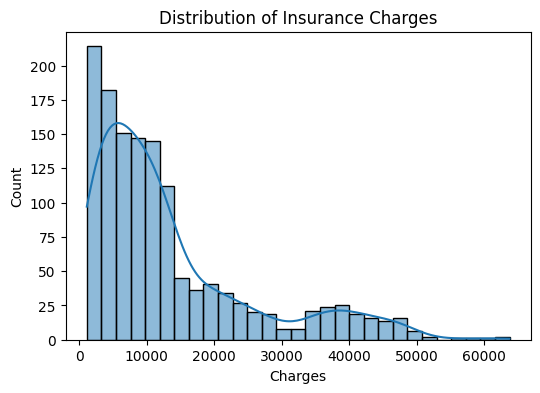

In [ ]:
# Target Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.show()


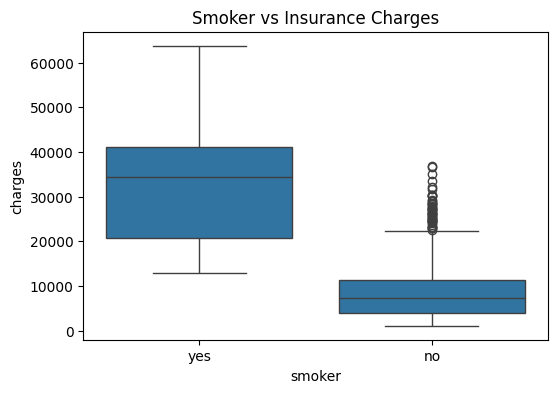

In [ ]:
# smoker vs charges
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Smoker vs Insurance Charges")
plt.show()


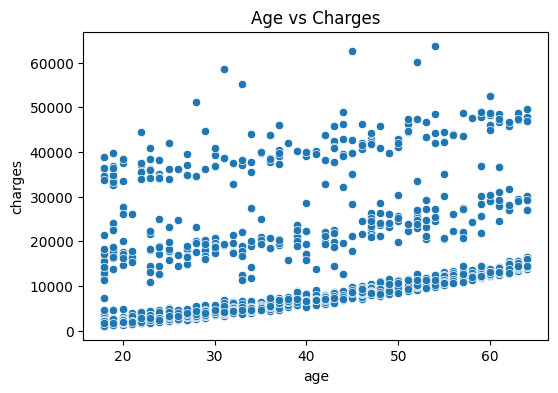

In [ ]:
#Age vs charges
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Charges")
plt.show()


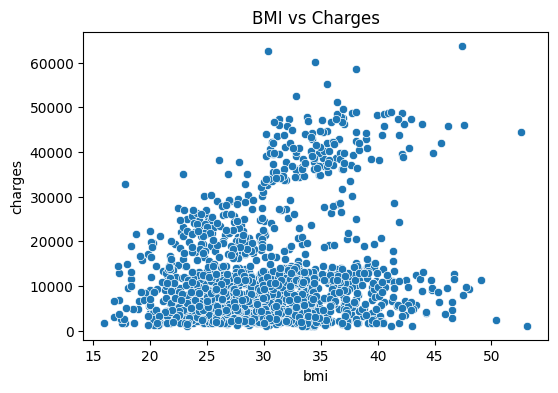

In [ ]:
# BMI vs Charges
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="charges", data=df)
plt.title("BMI vs Charges")
plt.show()


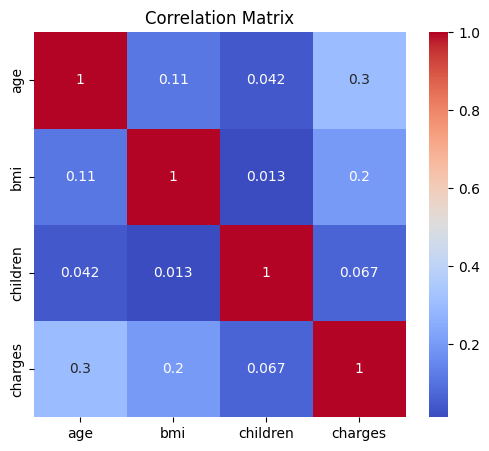

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_cols + [target]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Outlier detection
for col in numerical_cols + [target]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(col, "outlier %:",
          round(len(outliers)/len(df)*100, 2))


age outlier %: 0.0
bmi outlier %: 0.67
children outlier %: 0.0
charges outlier %: 10.4


In [ ]:
# encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
# train test split
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
# Feature scaling
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


**Key Findings**

Smoking status has the strongest impact on insurance cost.

Age shows a clear positive relationship with charges.

BMI has moderate influence.

Target distribution is right-skewed.

**Modeling Challenges**

Skewed target distribution

Interaction effects (age × smoker)

Potential non-linear relationships

**Feature Engineering Suggestions**

Add interaction term: age × smoker

Test polynomial regression

Log-transform charges if skewed

Create BMI risk category

In [ ]:
readme_content = """
# Medical Insurance Cost Prediction
Data Preprocessing & Visualization

## Dataset Source
US Health Insurance Dataset
link:https://www.kaggle.com/datasets/mirichoi0218/insurance
Row Count: ~13,000+
Target Variable: charges (Annual medical insurance cost in USD)
Type: Regression

---

## Problem Statement
The objective is to predict annual medical insurance charges
based on demographic and health-related attributes such as
age, BMI, number of children, smoking status, and region.

This is a regression problem.

---

## Summary of Preprocessing Decisions

• Checked and handled missing values (none significant found).
• Removed duplicate records to prevent modeling bias.
• Assessed outliers using IQR method; retained valid high-cost cases.
• Encoded categorical variables (sex, smoker, region) using One-Hot Encoding.
• Performed train-test split before scaling to avoid data leakage.
• Standardized numerical features (age, bmi, children) using StandardScaler.
• Identified right-skewness in target variable; log transformation may improve performance.

---

## Key Insights

• Smoking status has the strongest impact on insurance charges.
• Age shows a clear positive relationship with cost.
• BMI has moderate influence.
• Charges distribution is right-skewed with high-cost outliers.
• Interaction effects (e.g., age × smoker) may enhance model accuracy.

---

## Potential Next Modeling Steps

• Train Linear Regression and Random Forest Regressor.
• Evaluate using RMSE and R².
• Apply log transformation to target variable if needed.
• Introduce interaction features.
• Perform cross-validation for robust evaluation.

---

## Modeling Consideration

High insurance charges represent legitimate high-risk individuals.
Outliers were retained as they carry meaningful business value.
"""

with open("README.md", "w") as f:
    f.write(readme_content)

print("README.md file created successfully.")


README.md file created successfully.
